In [180]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
data = pd.read_csv("data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [184]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [185]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [186]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [187]:
data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [188]:
data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


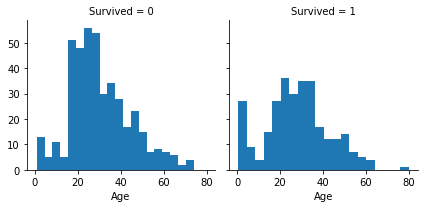

In [189]:
age_plot = sns.FacetGrid(data, col="Survived")
age_plot.map(plt.hist, 'Age', bins=20)

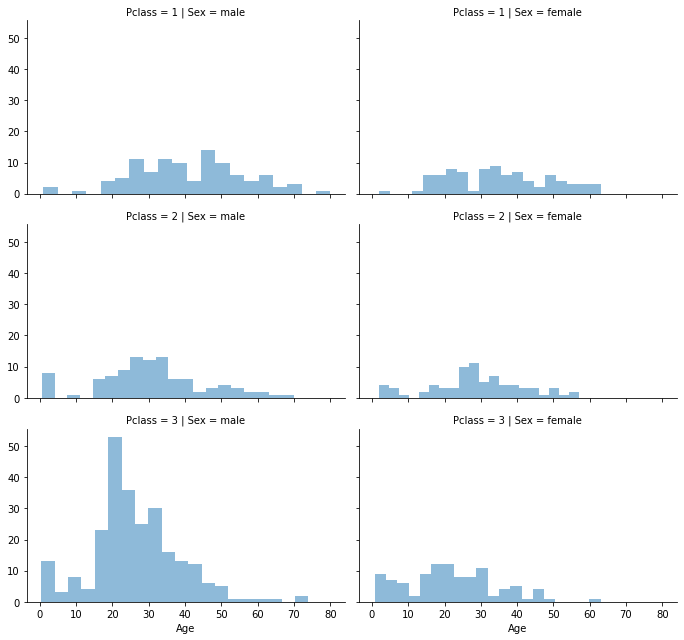

In [190]:
grid = sns.FacetGrid(data, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)


In [191]:
data = data.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1)

In [192]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [193]:
data['Title'] = data['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace(['Mme'], 'Mrs')

print(data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
pd.crosstab(data['Title'], data['Sex'])

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [194]:
data['Gender'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data = data.drop(['Sex', 'Name'], axis=1)

In [195]:
age_guess = np.zeros((2, 3))
dataset = data

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = dataset[(dataset['Gender'] == i) & (dataset['Pclass'] == j+1)]['Gender'].dropna()
        guess = guess_df.median()
        age_guess[i, j] = int(guess / 0.5 + 0.5) * .5 
for i in range(0, 2):
    for j in range(0, 3):
        dataset.loc[(dataset.Age.isnull()) & (dataset.Gender == i) & (dataset.Pclass == j+1), \
            'Age'] = age_guess[i, j]
dataset['Age'] = dataset['Age'].astype(int)

dataset.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,22,1,0,7.2500,S,Mr,0
1,1,1,38,1,0,71.2833,C,Mrs,1
2,1,3,26,0,0,7.9250,S,Miss,1
3,1,1,35,1,0,53.1000,S,Mrs,1
4,0,3,35,0,0,8.0500,S,Mr,0


In [196]:
dataset['AgeBand'] = pd.cut(data['Age'], 5)
dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.386282
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [197]:
dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[dataset['Age'] > 64,'Age'] = 4

data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender,AgeBand
0,0,3,1,1,0,7.2500,S,Mr,0,"(16.0, 32.0]"
1,1,1,2,1,0,71.2833,C,Mrs,1,"(32.0, 48.0]"
2,1,3,1,0,0,7.9250,S,Miss,1,"(16.0, 32.0]"
3,1,1,2,1,0,53.1000,S,Mrs,1,"(32.0, 48.0]"
4,0,3,2,0,0,8.0500,S,Mr,0,"(32.0, 48.0]"


In [199]:
dataset = dataset.drop(['AgeBand'], axis=1)

In [ ]:
dataset = 